<a href="https://colab.research.google.com/github/MustafaErboga/Project/blob/main/Cluestering_Analysis_Customers_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
pd.set_option('max_colwidth',1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_style("whitegrid")

#### Load Dataset

In [ ]:
df0 = pd.read_csv("Mall_Customers.csv")
df = df0.copy()

#### Explore Data

You can rename columns to more usable, if you need.

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.000,100.500,57.879,1.000,50.750,100.500,150.250,200.000
Age,200.000,38.850,13.969,18.000,28.750,36.000,49.000,70.000
Annual_Income,200.000,60.560,26.265,15.000,41.500,61.500,78.000,137.000
Spending_Score,200.000,50.200,25.824,1.000,34.750,50.000,73.000,99.000


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Gender,200,2,Female,112


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()


CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique().sort_values()

Gender              2
Age                51
Annual_Income      64
Spending_Score     84
CustomerID        200
dtype: int64

In [ ]:
df.drop(columns= "CustomerID", inplace=True)

In [ ]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





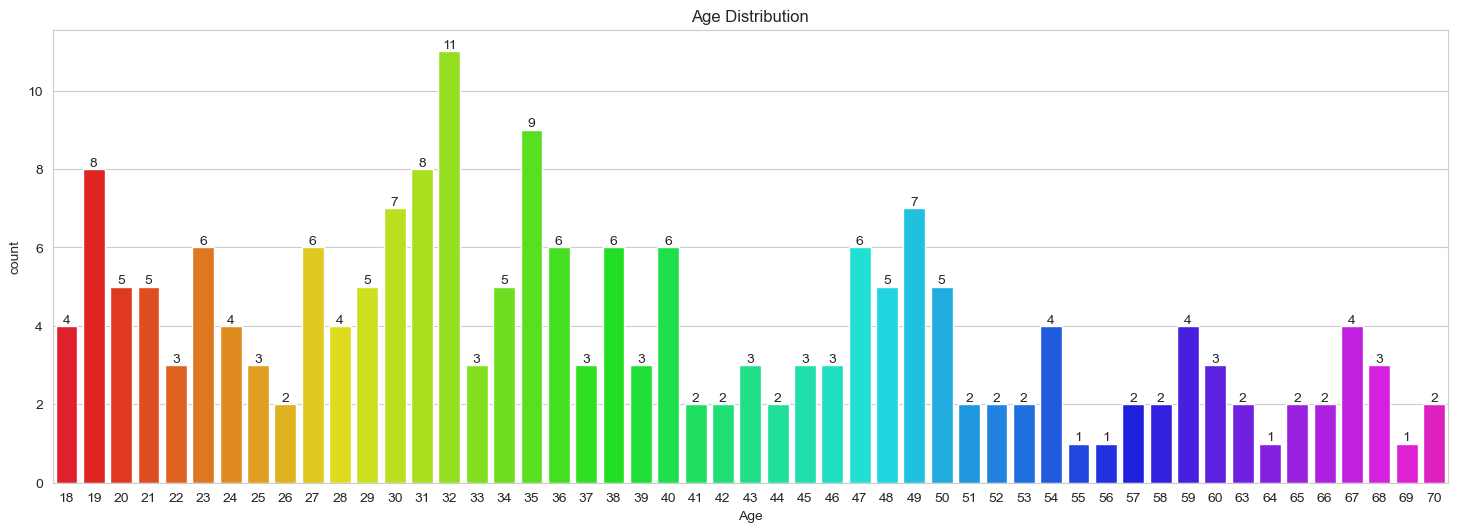

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.countplot(x ='Age', palette= "gist_rainbow", data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0]);

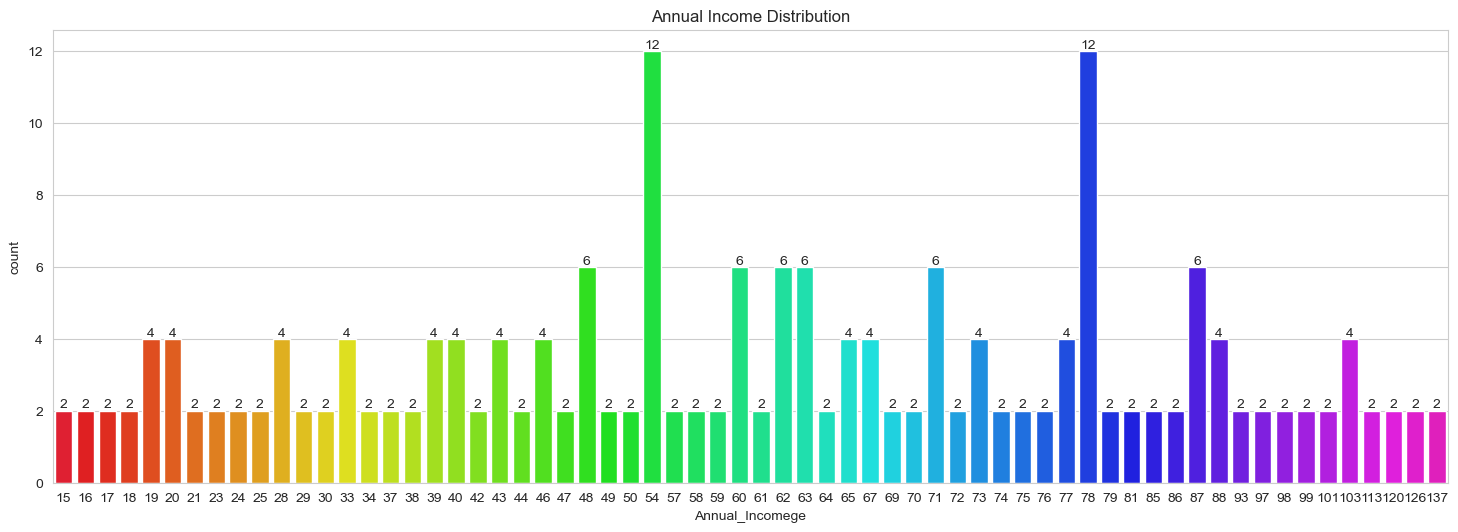

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.countplot(x ='Annual_Income', palette= "gist_rainbow", data = df)
plt.title('Annual Income Distribution')
plt.xlabel('Annual_Incomege')
ax.bar_label(ax.containers[0]);

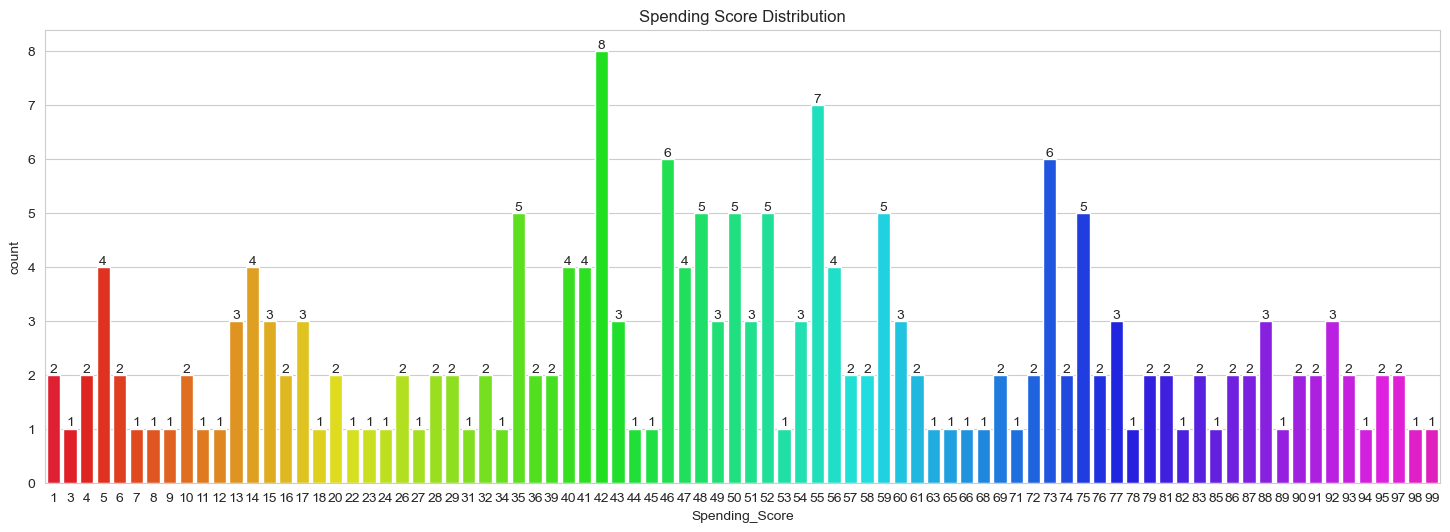

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.countplot(x ='Spending_Score', palette= "gist_rainbow", data = df)
plt.title('Spending Score Distribution')
plt.xlabel('Spending_Score')
ax.bar_label(ax.containers[0]);

Female    112
Male       88
Name: Gender, dtype: int64


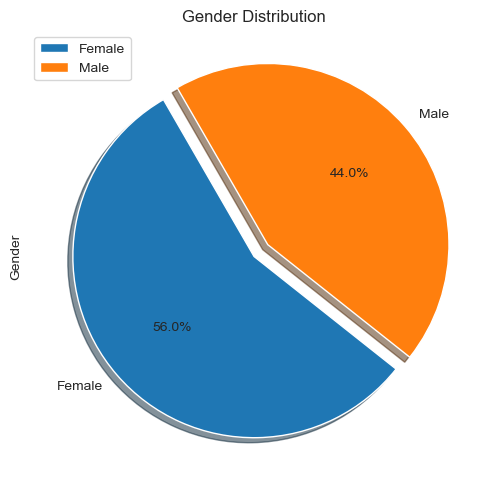

In [ ]:
print(df["Gender"].value_counts())
df["Gender"].value_counts().plot(kind="pie", explode=[0, 0.1], autopct='%1.1f%%', shadow=True,startangle=120,figsize=(6,6))
plt.legend(labels=['Female','Male'])
plt.title('Gender Distribution');

In [ ]:
df.corr()

,Age,Annual_Income,Spending_Score
Age,1.000,-0.012,-0.327
Annual_Income,-0.012,1.000,0.010
Spending_Score,-0.327,0.010,1.000


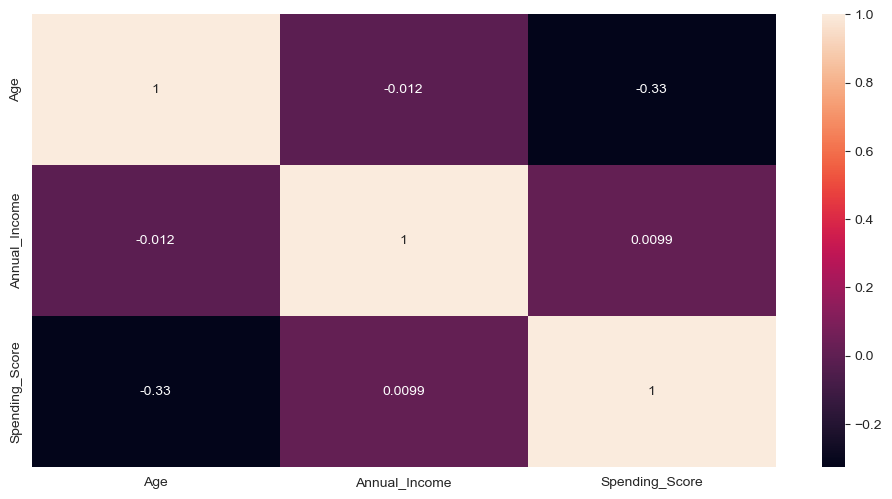

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True);

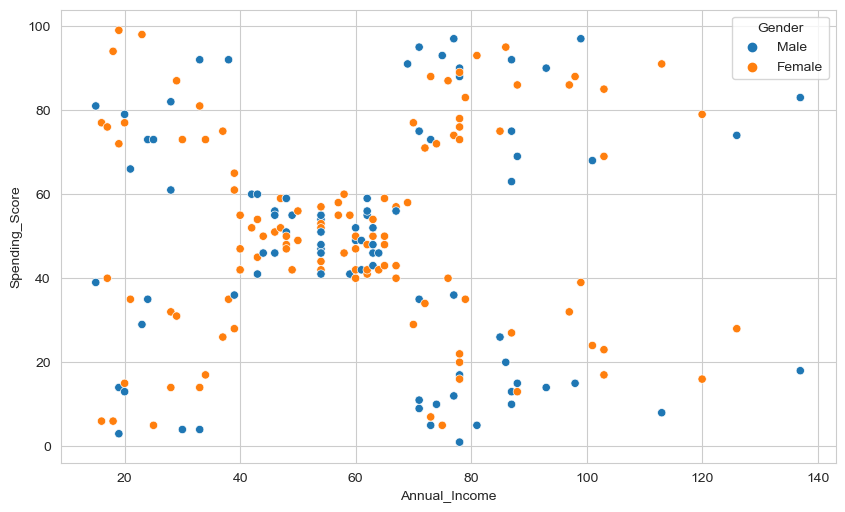

In [ ]:
sns.scatterplot(data=df, x ='Annual_Income', y='Spending_Score', hue = "Gender");

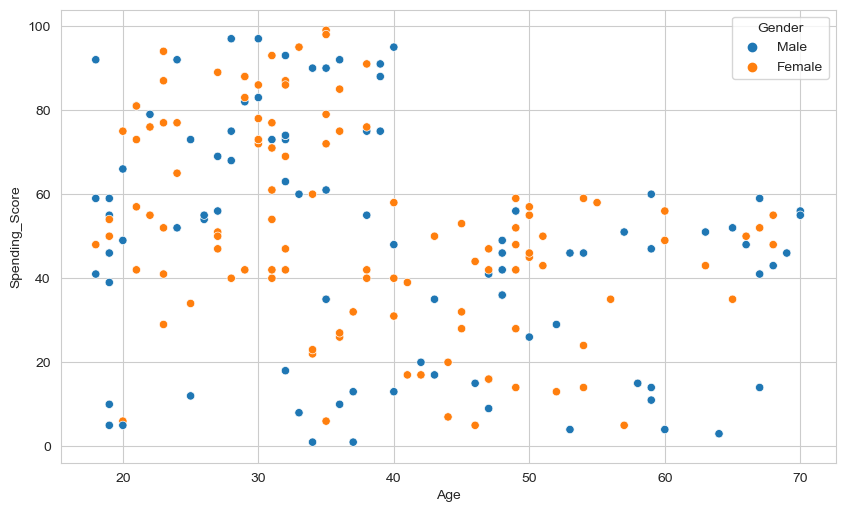

In [ ]:
sns.scatterplot(data = df, x = "Age", y = "Spending_Score", hue = "Gender");

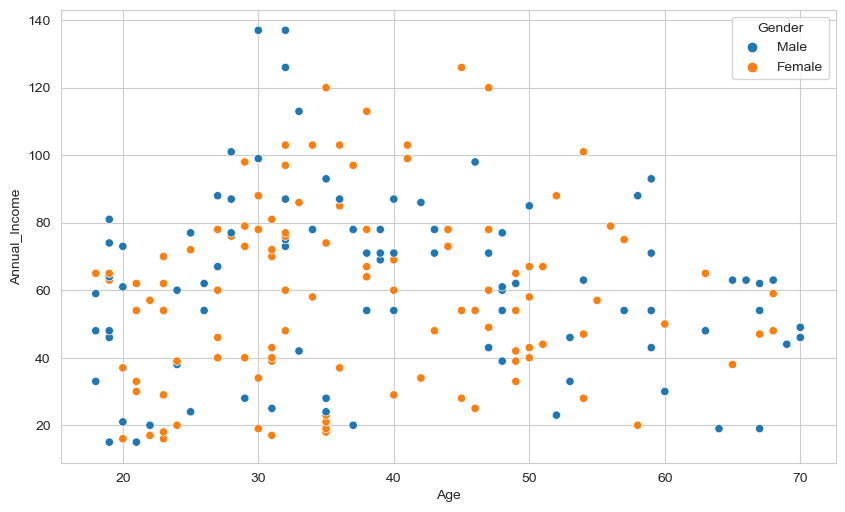

In [ ]:
sns.scatterplot(data=df, y ='Annual_Income', x='Age', hue = "Gender");

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [ ]:
# Çok fazla feature ile clustering kalitesi bozulacağından ilk olarak Age ve Spending_Score ile modelimizi oluşturuyoruz

In [ ]:
df1 = df.loc[:,['Age','Spending_Score']]
df1.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [ ]:
# !pip install pyclustertend --user
from pyclustertend import hopkins

In [ ]:
hopkins(df1, df1.shape[0])
# hopkins; elimizdeki data clusteringe ne kadar yatkın bunu ölçer, 0.5'den küçükse kümelemeye yatkındır.

0.3041062556784258

#### *ii. Determine optimal number of clusters*

Text(0.5, 1.0, 'elbow method')

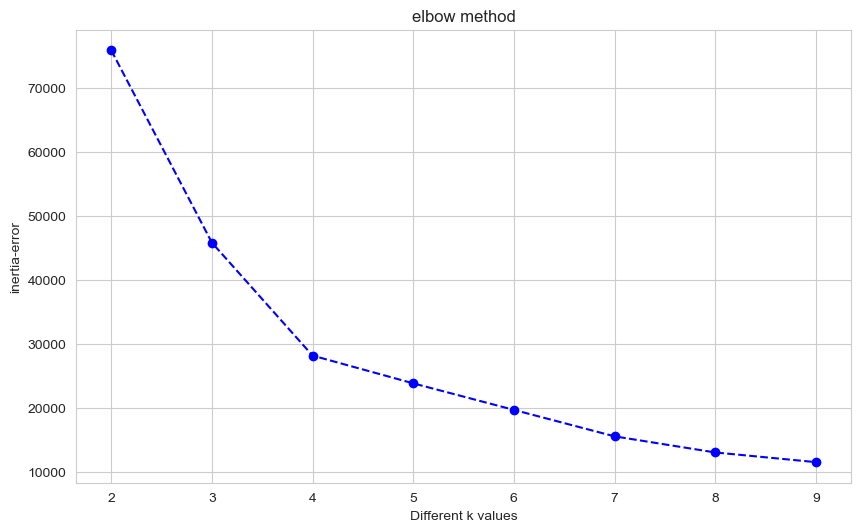

In [ ]:
from sklearn.cluster import KMeans
ssd = []

K = range(2,10)

for k in K:
    model1 = KMeans(n_clusters =k, random_state=101)
    model1.fit(df1)
    ssd.append(model1.inertia_)

plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

# inertia  kümelerdeki gözlemlerin centroidlerini  ne sıklıkta çevrelediğini hesaplar.
# inertia ne kadar küçükse kümeler kendi içerisinde  centroidlerini o kadar iyi çevrelemiştir.
# elbow methodu inertia üzerinden hareket eder diğer kümelerle olan uzaklığa bakmaz.
# elbow method'una göre sert düşüşün durduğu "ilk" nokta optimal k'dır.bazı datalarda 2-3 tane sert düşüş olabilir.

In [ ]:
ssd # sum of squared distance

[75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23818.84825158133,
 19664.73951714552,
 15523.684014328755,
 13002.466488382794,
 11486.150087792641]

In [ ]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff
# ssd.diff() yaparsak hata alırız çünkü diff() series'e has bir metottur ve kendinden öncekiyle fark alır.

,0
1,NaN
2,30108.479
3,17675.093
4,4346.735
5,4154.109
6,4141.056
7,2521.218
8,1516.316


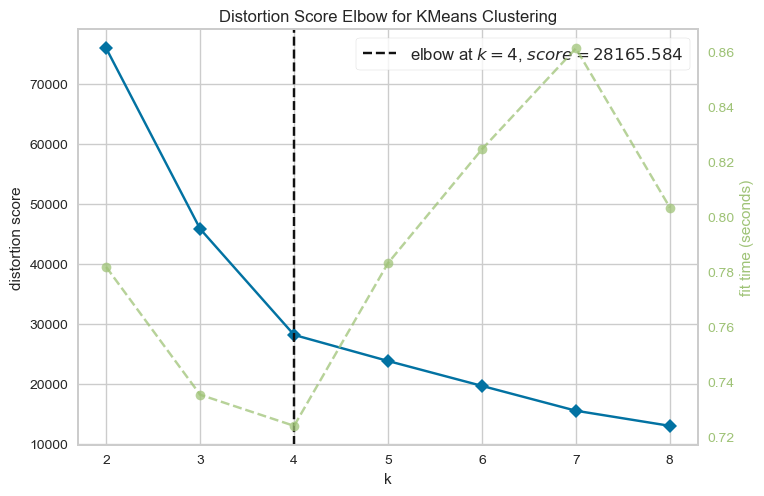

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model2 = KMeans(random_state=101)
visualizer = KElbowVisualizer(model2, k=(2,9))

visualizer.fit(df1)        # Fit the data to the visualizer
visualizer.poof();

# yellowbrick sert düşüşün durduğu ilk noktayı değil anlamlı bir düşüşün durduğu noktayı dikkate alarak tavsiyede bulunur
# elbow optimal k olarak 4 önerdi.Ama biz biliyoruz ki elbow method inertia'yı dikkate alarak çalışıyor, ideal kümelemede
# bizim için kümeler arası mesafe de önemliydi.Bundan dolayı Silhouette analysis yaparak optimal k için bir tavsiye de 
#buradan alacağız.

### Why silhouette_score is negative?

![image.png](attachment:image.png)

In [ ]:
from sklearn.metrics import silhouette_score
# silhouette_score ; yaptığımız kümelemenin kalitesini ölçen bir metriktir, inertia her küme kendi içerisinde centroidi  
# etrafında ne sıklıkta kümelenmiş bunu ölçüyor (küme içi mesafelere bakıyor yani). Ama bizim ideal clusteringten anlamamız
# gereken bir de maximal inter cluster distance idi  ve silhouette_score işte bu durumu  hesaba katıyor.

In [ ]:
silhouette_score(df1, KMeans(random_state = 101).fit_predict(df1))

0.4331607448298594

In [ ]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(df1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.46342248553207704
For n_clusters=6, the silhouette score is 0.4235290823884998
For n_clusters=7, the silhouette score is 0.4212938931368575
For n_clusters=8, the silhouette score is 0.4331607448298594


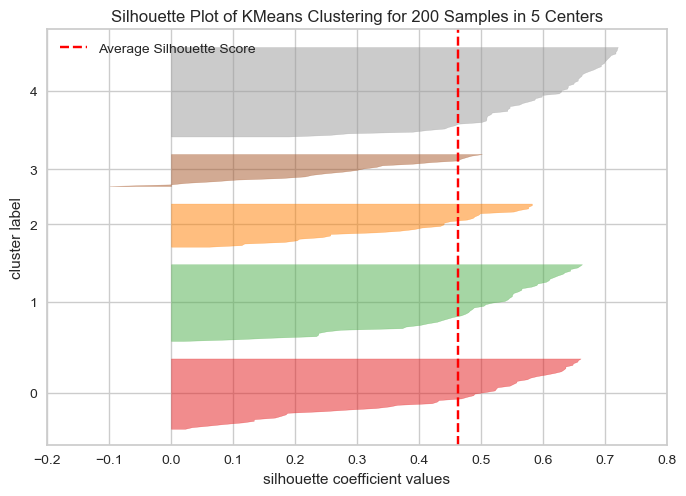

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(n_clusters=5, random_state=101))
visualizer.fit(df1)    # Fit the data to the visualizer
visualizer.poof();
# yellowbrick'in bu özelliğiyle bir her bir cluster'ın ayrı ayrı silhouette score'larını görebiliyoruz.
# n_clusters=4 'de silhouette score yüksek; elbow ve yellowbrick de 4 önermişti. Bu yüzden seçimizi n_clusters=4 yapıyoruz

#### *iii. Apply K Means*

In [ ]:
KMeans(n_clusters =4, random_state=101).fit_predict(df1)

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 0,
       1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#### *iv. Visualizing and Labeling All the Clusters*

In [ ]:
df1["predicted_clusters_1KMeans"] = KMeans(n_clusters = 4, random_state=101).fit_predict(df1)
df1.sample(10)

,Age,Spending_Score,predicted_clusters_1KMeans
139,35,72,2
144,25,12,1
94,32,42,0
140,57,5,1
197,32,74,2
121,38,40,0
45,24,65,0
120,27,56,0
90,68,55,3
110,65,52,3


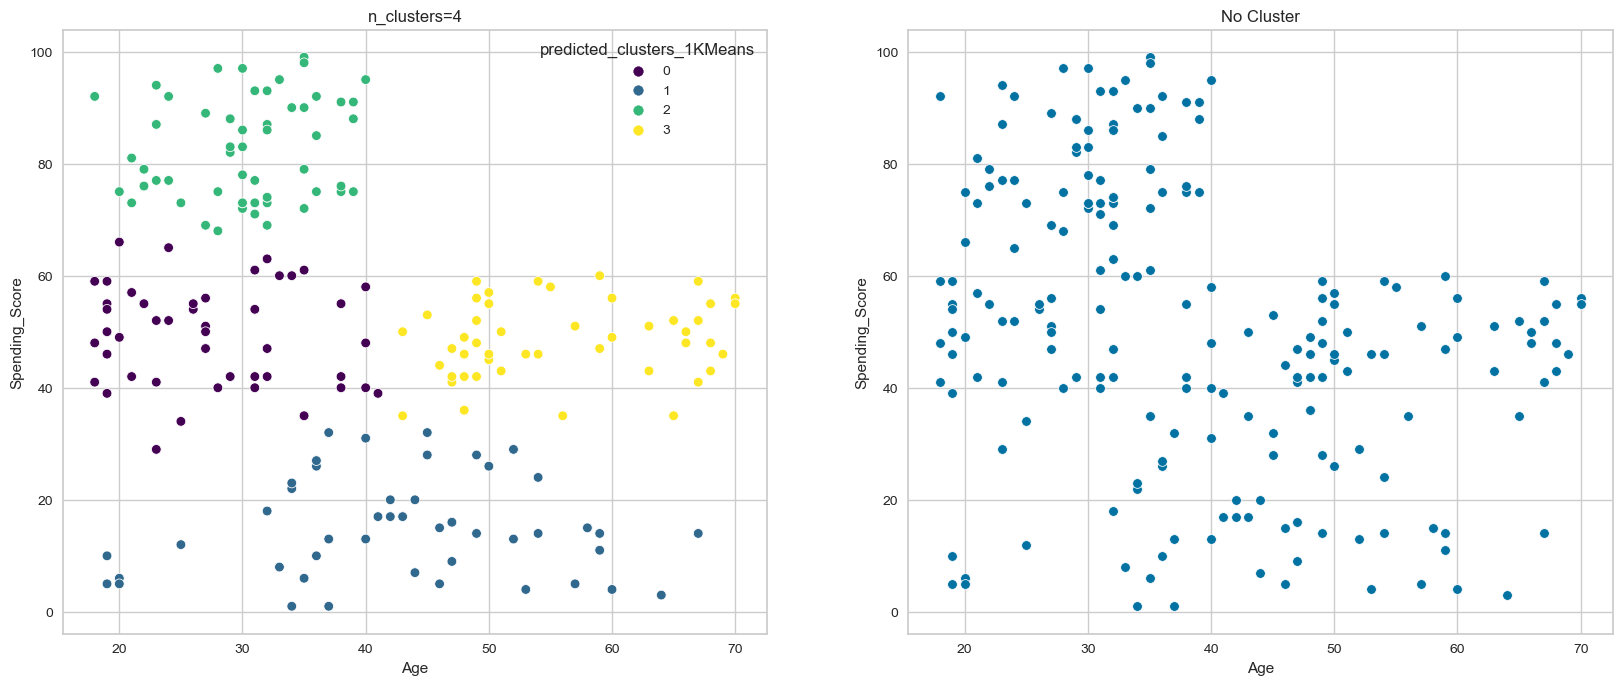

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df1, x = "Age",y = "Spending_Score", palette="viridis", hue = 'predicted_clusters_1KMeans')
plt.title("n_clusters=4")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df1, x = "Age",y = "Spending_Score")
plt.title("No Cluster");

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [ ]:
# ikinci olarak Annual_Income ve Spending_Score ile modelimizi oluşturuyoruz
df2 = df.loc[:,['Annual_Income','Spending_Score']]
df2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
hopkins(df2, df2.shape[0])
# hopkins; elimizdeki data clusteringe ne kadar yatkın bunu ölçer, 0.5'den küçükse kümelemeye yatkındır.

0.29534520118278357

#### *ii. Determine optimal number of clusters*

Text(0.5, 1.0, 'elbow method')

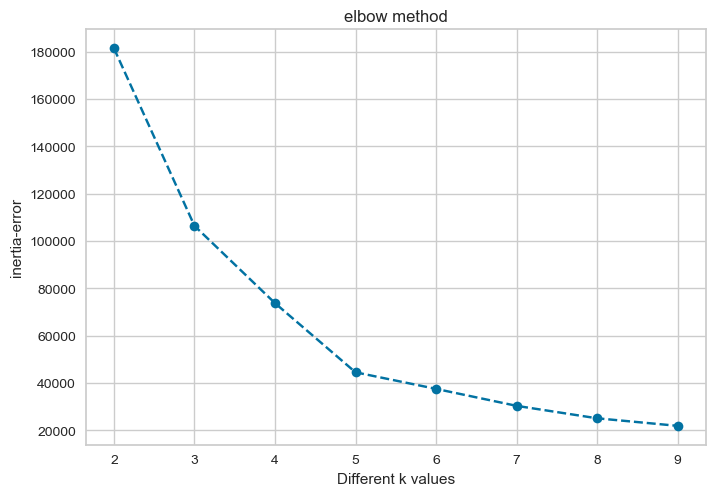

In [ ]:
ssd = []

K = range(2,10)

for k in K:
    model3 = KMeans(n_clusters = k, random_state=101)
    model3.fit(df2)
    ssd.append(model3.inertia_)

plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [ ]:
ssd 

[181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37442.24745037571,
 30273.394312070042,
 25011.920255473768,
 21818.114588452183]

In [ ]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,75015.223
3,32668.584
4,29231.334
5,7006.208
6,7168.853
7,5261.474
8,3193.806


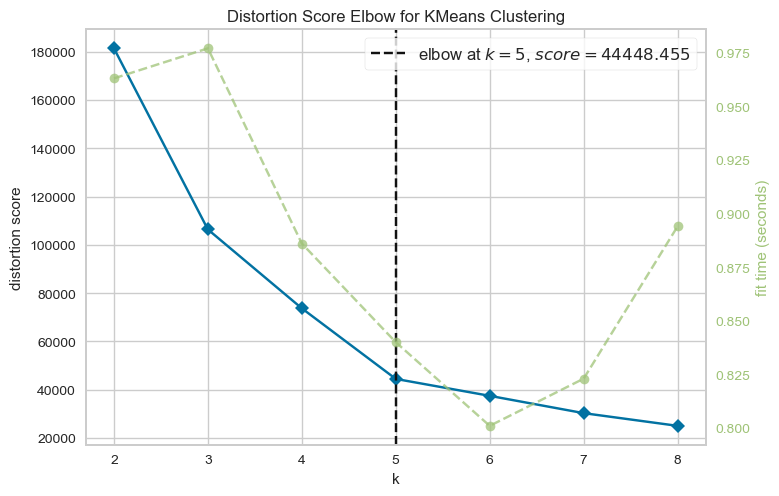

In [ ]:
model4 = KMeans(random_state=101)
visualizer = KElbowVisualizer(model4, k=(2,9))

visualizer.fit(df2)        
visualizer.poof();

# elbow optimal k olarak 5 önerdi, scatterplot'a göre de optimal k 5 gibiydi , yellowbrick de 5 önerdi .
# Ama biz biliyoruz ki elbow method inertia'yı dikkate alarak çalışıyor ideal kümelemede bizim için kümeler arası 
# mesafe de önemliydi.Bundan dolayı Silhouette analysis yaparak optimal k için bir tavsiye de buradan alacağız.

In [ ]:
silhouette_score(df2, KMeans(random_state = 101).fit_predict(df2))

0.4551839202075395

In [ ]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:

    kmeans_ = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans_.fit(df2)
    cluster_labels = kmeans_.labels_
    
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.5367558067779578
For n_clusters=7, the silhouette score is 0.5270287298101395
For n_clusters=8, the silhouette score is 0.4551839202075395


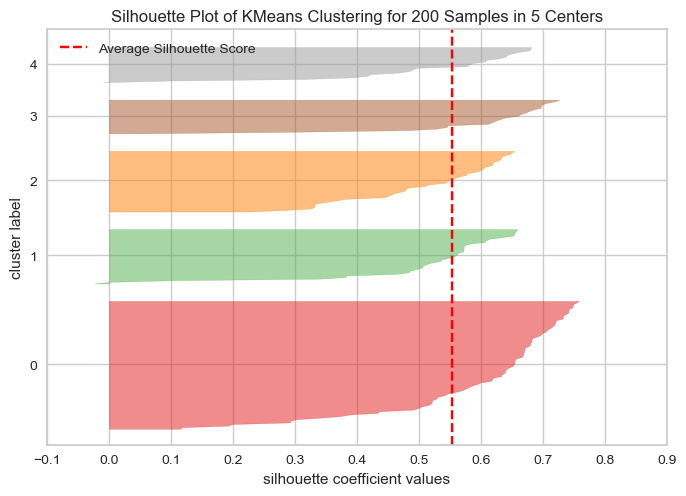

In [ ]:
visualizer_ = SilhouetteVisualizer(KMeans(n_clusters=5, random_state=101))
visualizer_.fit(df2)    # Fit the data to the visualizer
visualizer_.poof();
# yellowbrick'in bu özelliğiyle bir her bir cluster'ın ayrı ayrı silhouette score'larını görebiliyoruz.
# n_clusters=5 'de silhouette score yüksek; elbow ve yellowbrick de 5 önermişti. Bu yüzden seçimizi n_clusters=5 yapıyoruz

#### *iii. Apply K Means*

In [ ]:
KMeans(n_clusters =5, random_state=101).fit_predict(df2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#### *iv. Visualizing and Labeling All the Clusters*

In [ ]:
df2["predicted_clusters_2KMeans"] = KMeans(n_clusters = 5, random_state=101).fit_predict(df2)
df2.sample(10)

,Annual_Income,Spending_Score,predicted_clusters_2KMeans
194,120,16,1
108,63,43,0
160,79,35,1
26,28,32,4
126,71,35,0
190,103,23,1
55,43,41,0
102,62,59,0
179,93,90,2
175,88,86,2


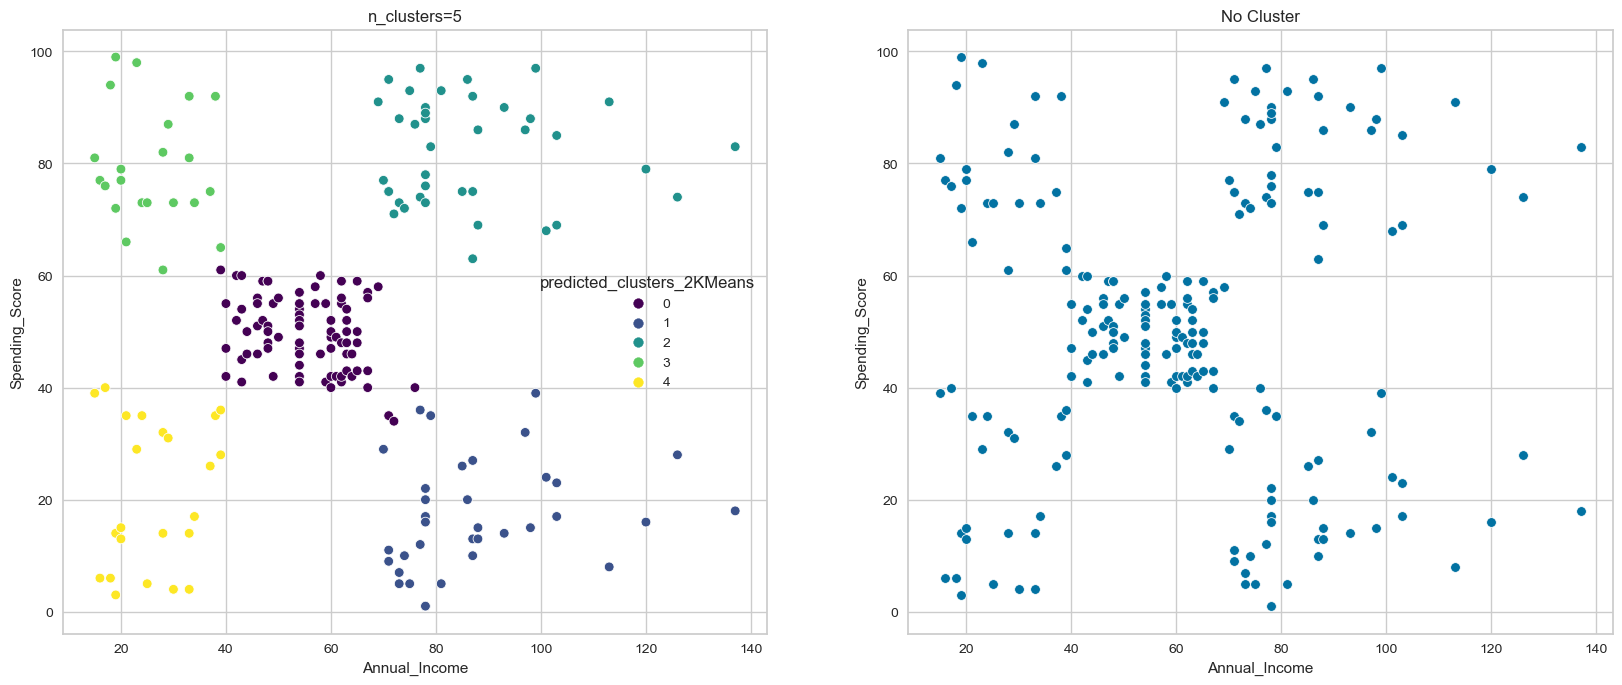

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df2, x = "Annual_Income",y = "Spending_Score", palette="viridis", hue = 'predicted_clusters_2KMeans')
plt.title("n_clusters=5")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df2, x = "Annual_Income",y = "Spending_Score")
plt.title("No Cluster");

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# dendogram datayı isterken aynı zamanda mesafelerin neye göre ölçüleceği bilgisini de ister.
# Bu sebeple linkage fonksiyonu içine hem datamızı tanımlayıp hemde ölçümün neye göre yapılacağı belitilerek. linkage
# fonksiyonu dendogram içerine verilir. Bu bilgiler ışığında dendogram gözlemleri kümelere atar ve bu atama işlemlerini bir 
# dallanma şeklinde bize sunar.

hc_ward = linkage(y = df1, method = "ward")
hc_complete = linkage(df1, "complete")
hc_average = linkage(df1, "average")
hc_single = linkage(df1, "single")

# dendograma vermek üzere datamızı ve mesafelerin neye göre ölçüleceği bilgisini linkage fonksiyonuna veriyoruz.

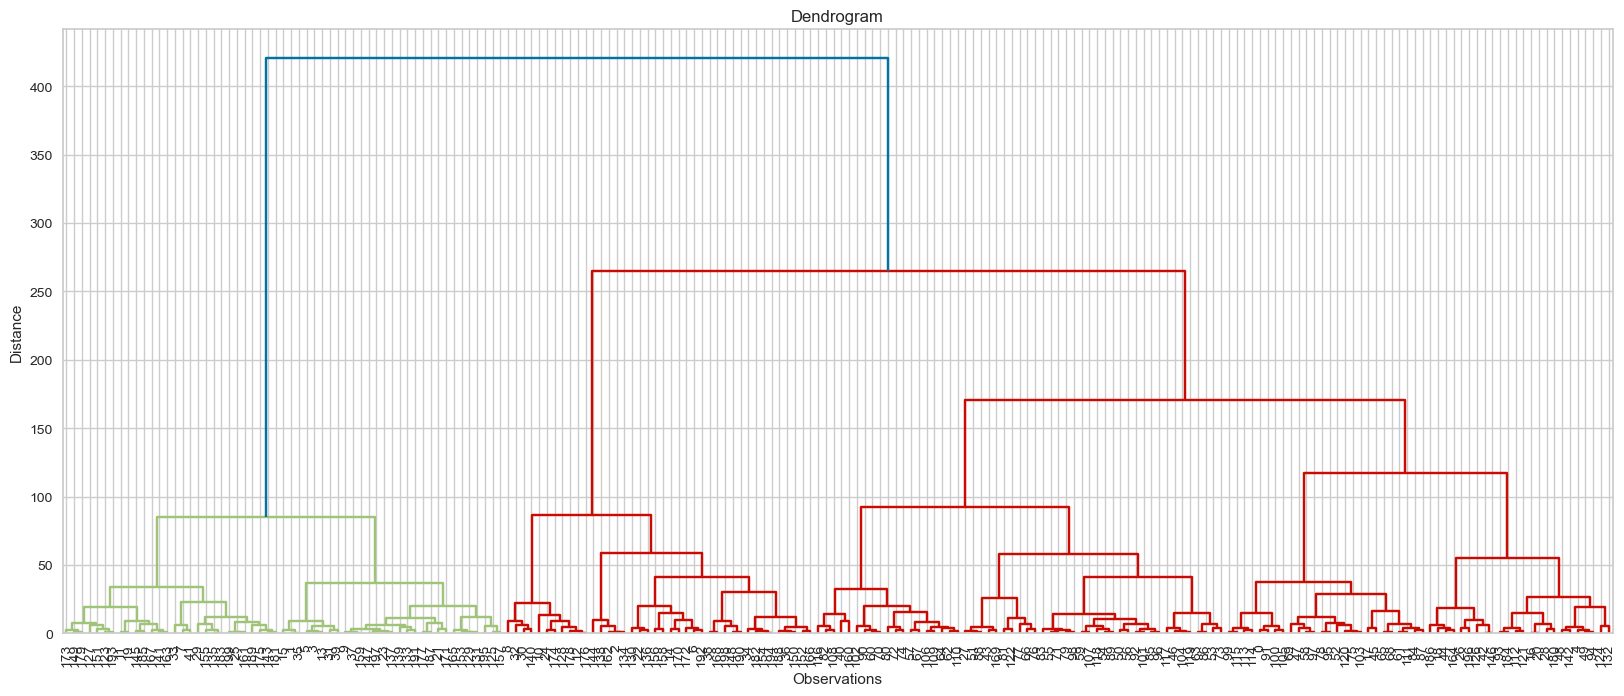

In [ ]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

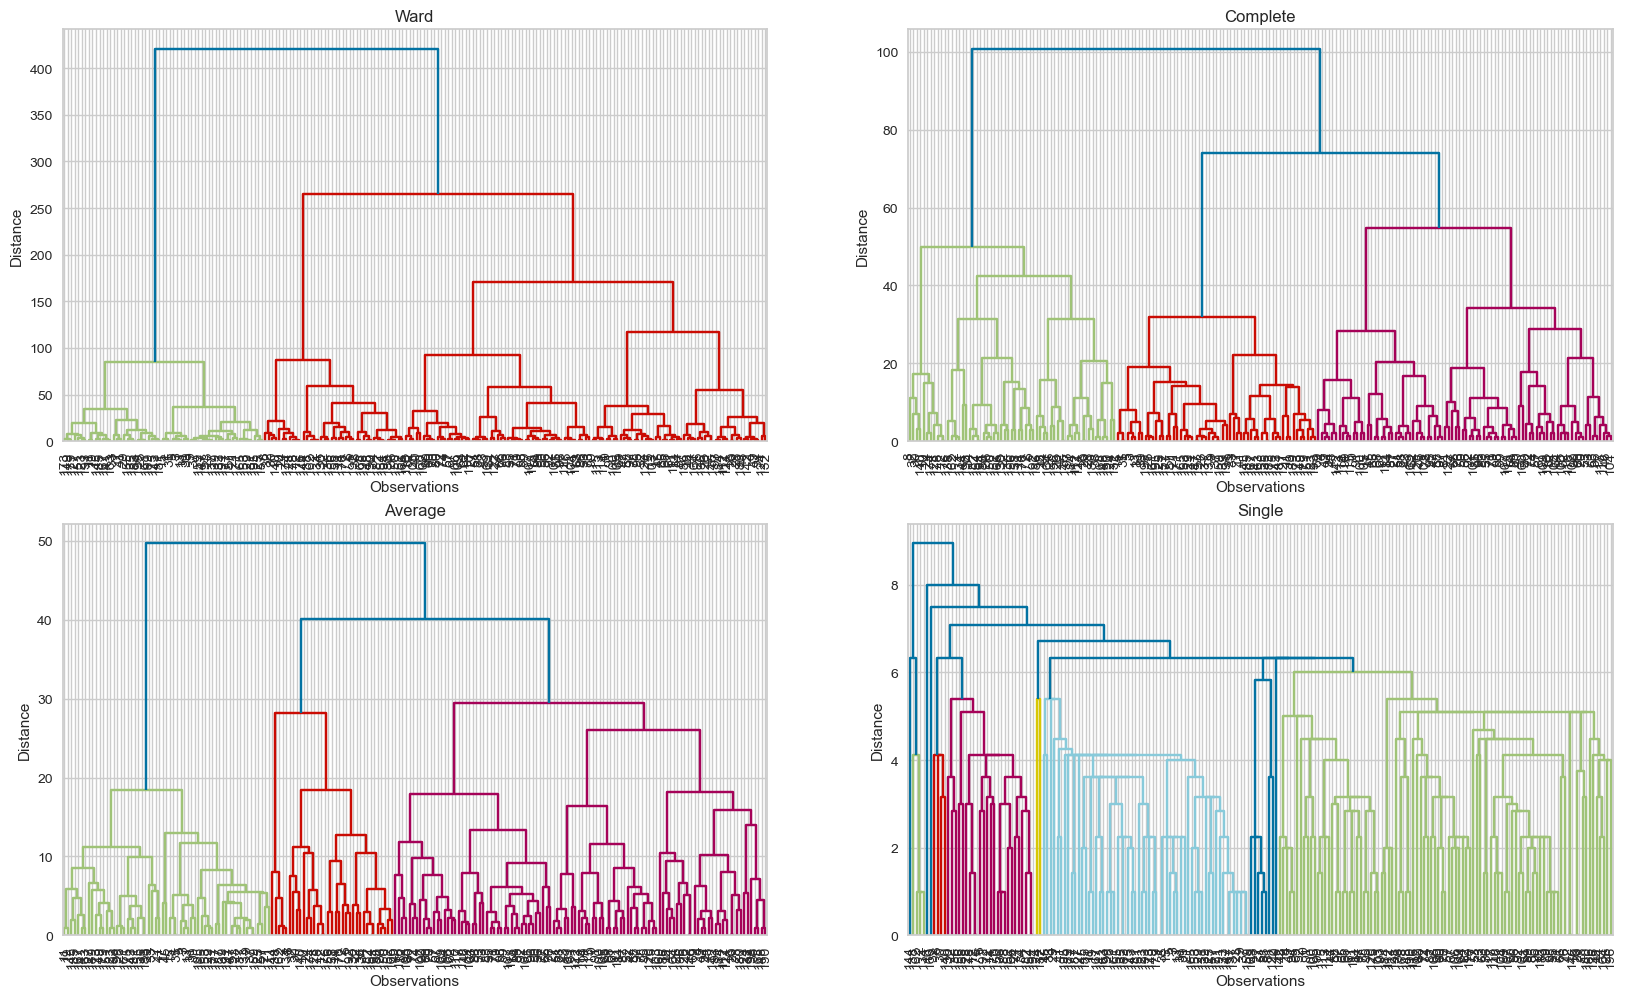

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

# kümeler içi minimum kümeler arası maksimum mesafeyi ward sağladığından ward ile devam edeceğiz.
# dendogramın mavi çizgi ile gösterdiği bize tavsiye ettiği küme sayısıdır. Ancak dendogram kümeler arası mesafeyi max 
# yapacak şekilde bize bir öneride bulunur ama biz yine sadece dendogramdan değil, scatter plot ve silhouette scoredan
# faydalanıp ona göre karar vereceğiz.

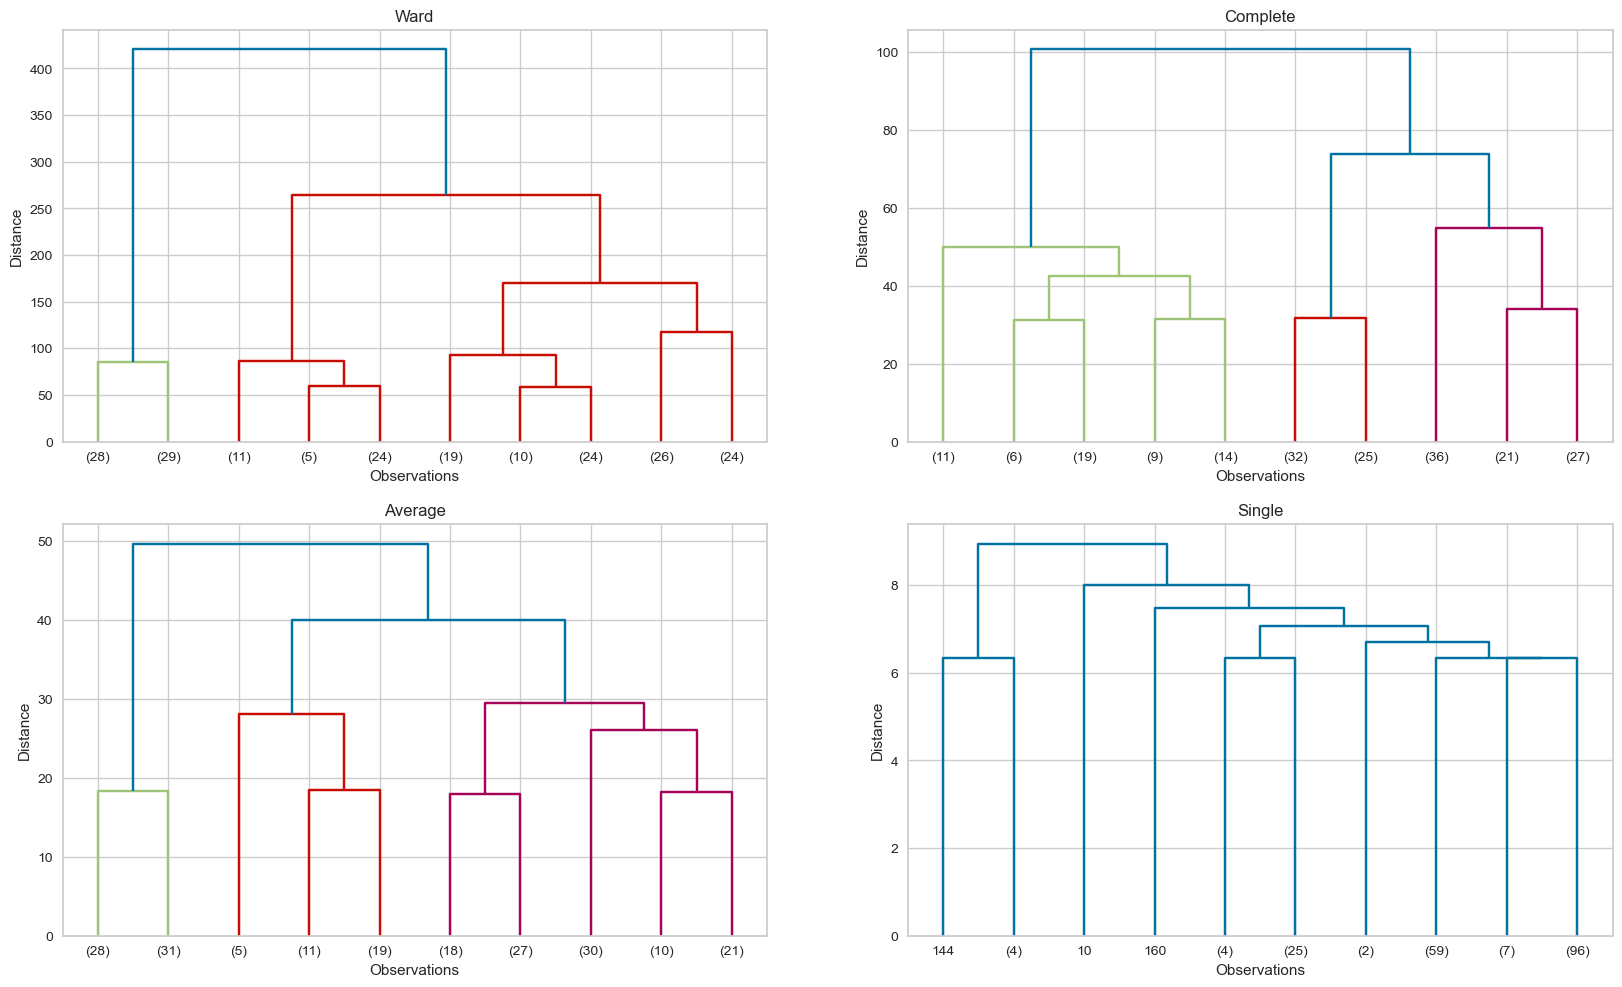

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

# truncate_mode='lastp' ve p=10 ayarlanarak dendogramın sadece son 10 kümeyi bize gösterecek şekilde sadeleştirme yapması
# sağlanır.

## Clustering based on Annual Income and Spending Score- x2

In [ ]:
hc_ward = linkage(y = df2, method = "ward")
hc_complete = linkage(df2, "complete")
hc_average = linkage(df2, "average")
hc_single = linkage(df2, "single")

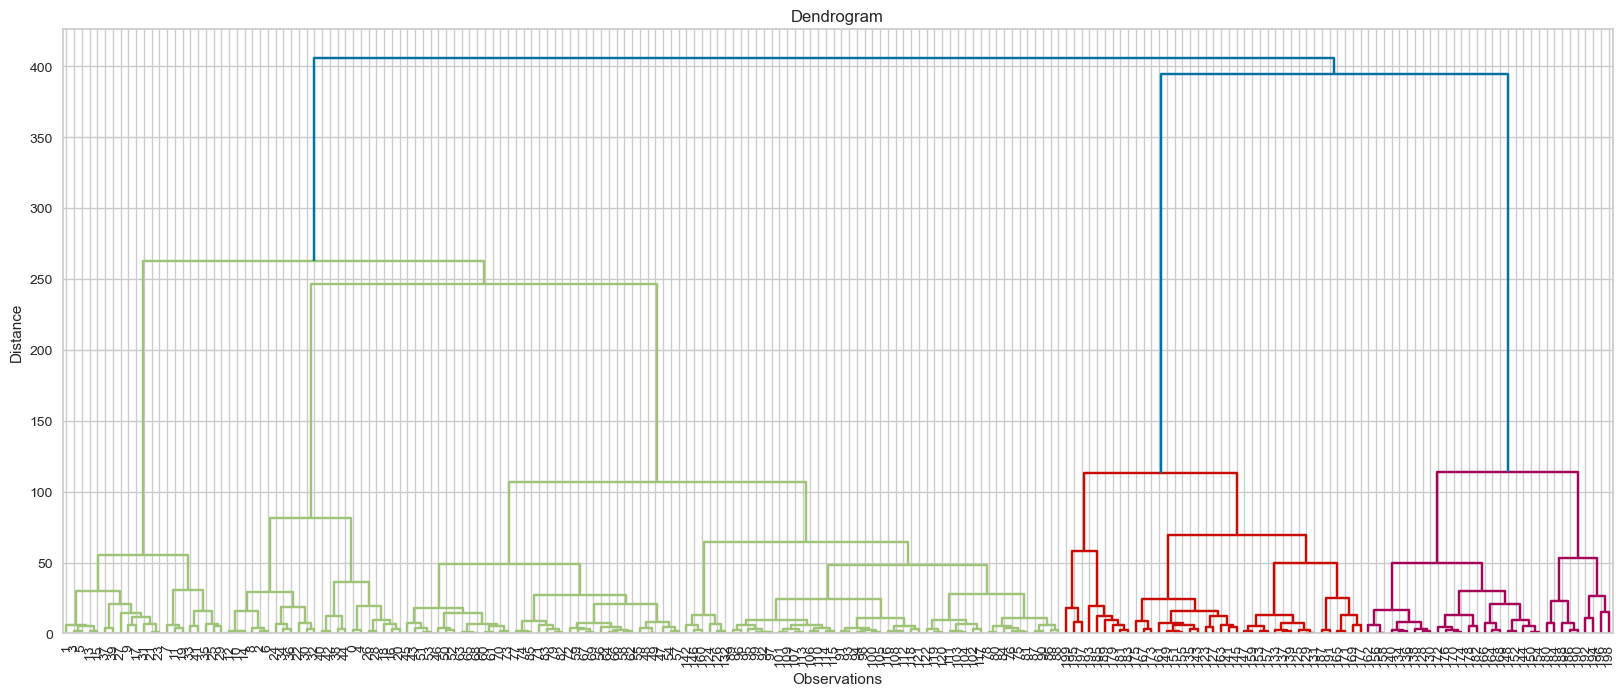

In [ ]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

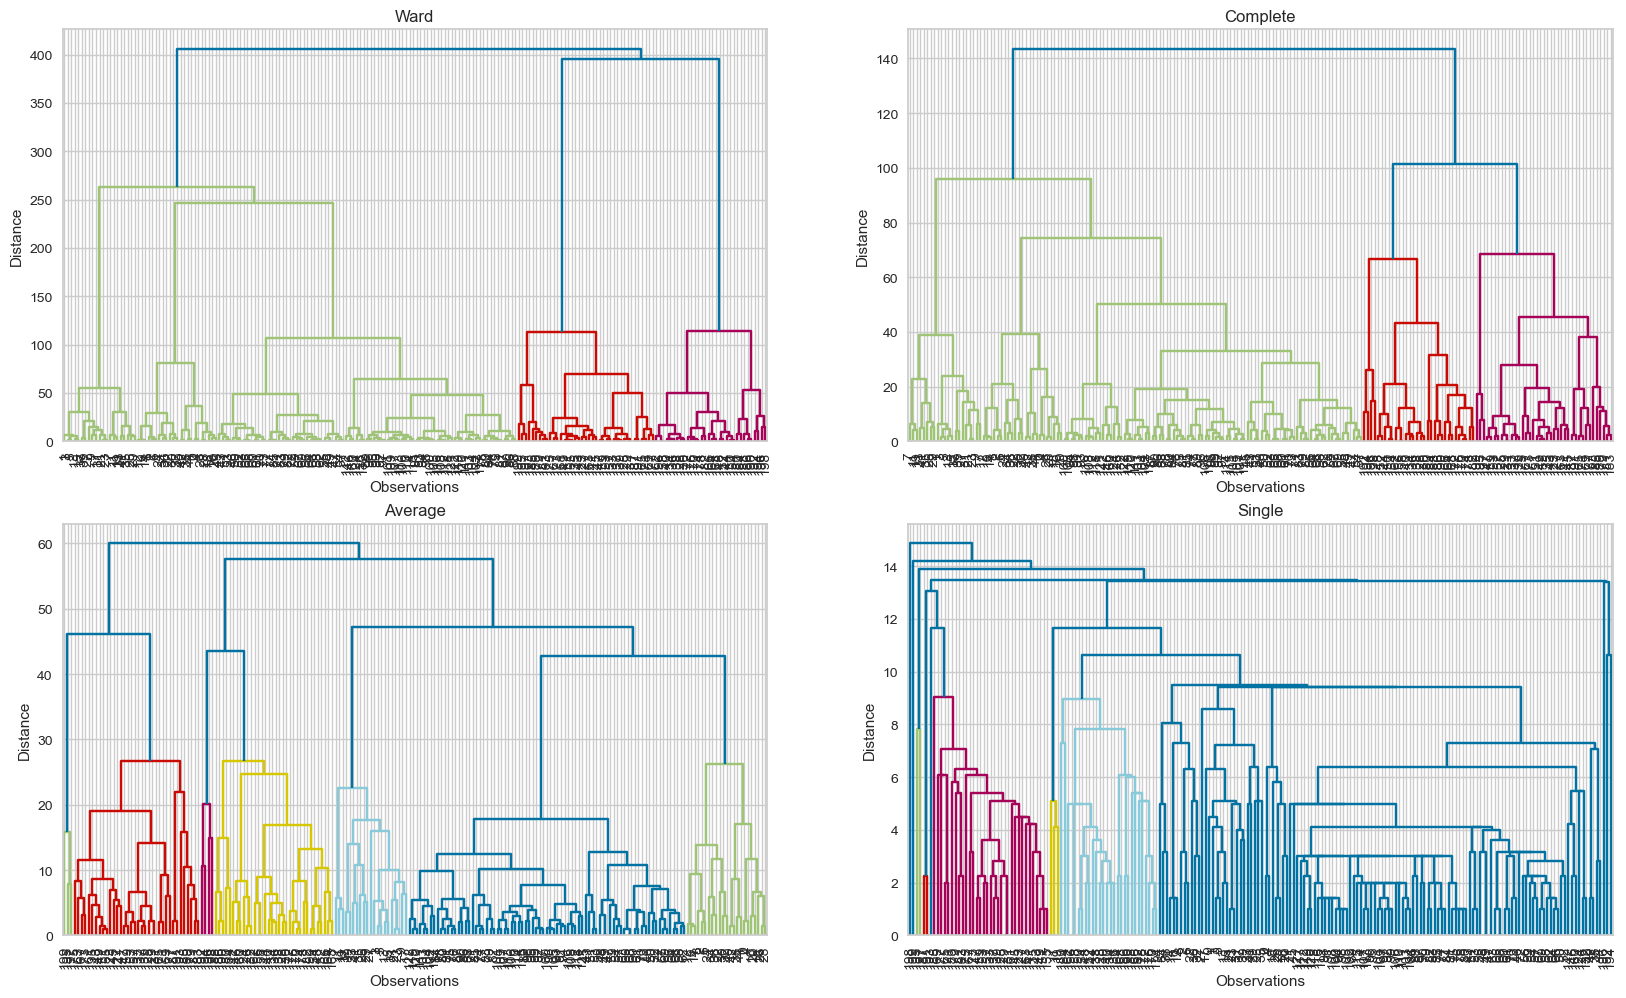

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

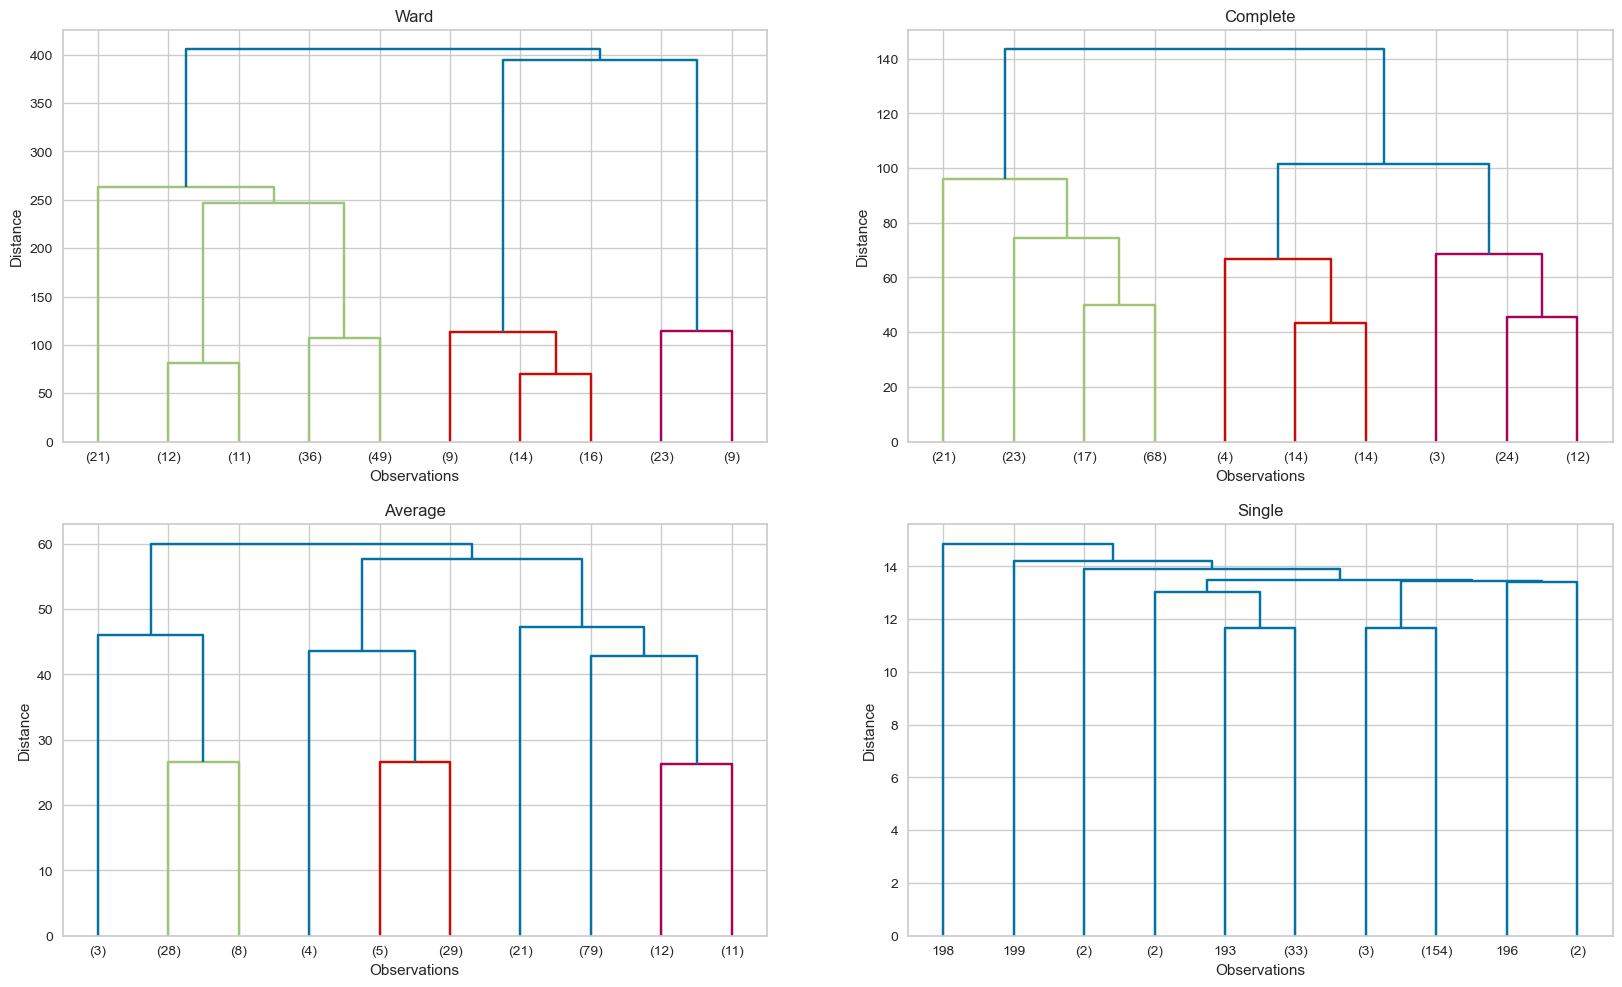

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model5 = AgglomerativeClustering(n_clusters=2, affinity = "euclidean", linkage = "ward")
# default değerleri ile modeli çalıştırıyoruz.

In [ ]:
model5.fit_predict(df1)
# k-means'te olduğu hierarchical clustarın predict özelliği yoktur. Tek başına çalışmaz.

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [ ]:
model5.labels_
# fit veya fit_predict yaptıktan sonra label_ attribute ile clusterları görebiliriz.

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [ ]:
K = range(2,10)

for k in K:
    model6 = AgglomerativeClustering(n_clusters = k)
    model6.fit(df1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1, model6.labels_)}')

# n_clusters=4'de silhouette skor en yüksek olduğundan n_clusters=4 ile devam edeceğiz

Silhouette Score for 2 clusters: 0.45454592584148096
Silhouette Score for 3 clusters: 0.4406245222112989
Silhouette Score for 4 clusters: 0.4608405468661758
Silhouette Score for 5 clusters: 0.4043739061256346
Silhouette Score for 6 clusters: 0.4125751937244674
Silhouette Score for 7 clusters: 0.4158018450743115
Silhouette Score for 8 clusters: 0.3881443379710403
Silhouette Score for 9 clusters: 0.39456163701637914


In [ ]:
model7 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model7.fit_predict(df1)

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

In [ ]:
model7.labels_

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

#### Annual Income and Spending Score- x2

In [ ]:
model8 = AgglomerativeClustering(n_clusters=2, affinity = "euclidean", linkage = "ward")

In [ ]:
model8.fit_predict(df2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [ ]:
model8.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [ ]:
K = range(2,10)

for k in K:
    model9 = AgglomerativeClustering(n_clusters = k)
    model9.fit(df2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df2, model9.labels_)}')

# n_clusters=5'de silhouette bskor en yüksek olduğundan n_clusters=5 ile devam edeceğiz

Silhouette Score for 2 clusters: 0.36658258970912255
Silhouette Score for 3 clusters: 0.4612907084201447
Silhouette Score for 4 clusters: 0.49150837154412275
Silhouette Score for 5 clusters: 0.5542164886093149
Silhouette Score for 6 clusters: 0.5391819652493749
Silhouette Score for 7 clusters: 0.5210151535996677
Silhouette Score for 8 clusters: 0.4333916065552157
Silhouette Score for 9 clusters: 0.439732146230979


In [ ]:
model10 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
model10.fit_predict(df2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [ ]:
model10.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [ ]:
df1["predicted_clusters_1Agg"] = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward").fit_predict(df1)
df1.sample(10)

,Age,Spending_Score,predicted_clusters_1KMeans,predicted_clusters_1Agg
7,23,94,2,3
130,47,9,1,2
72,60,49,3,1
133,31,71,2,3
68,19,59,0,0
113,19,46,0,0
35,21,81,2,3
191,32,69,2,3
110,65,52,3,1
151,39,88,2,3


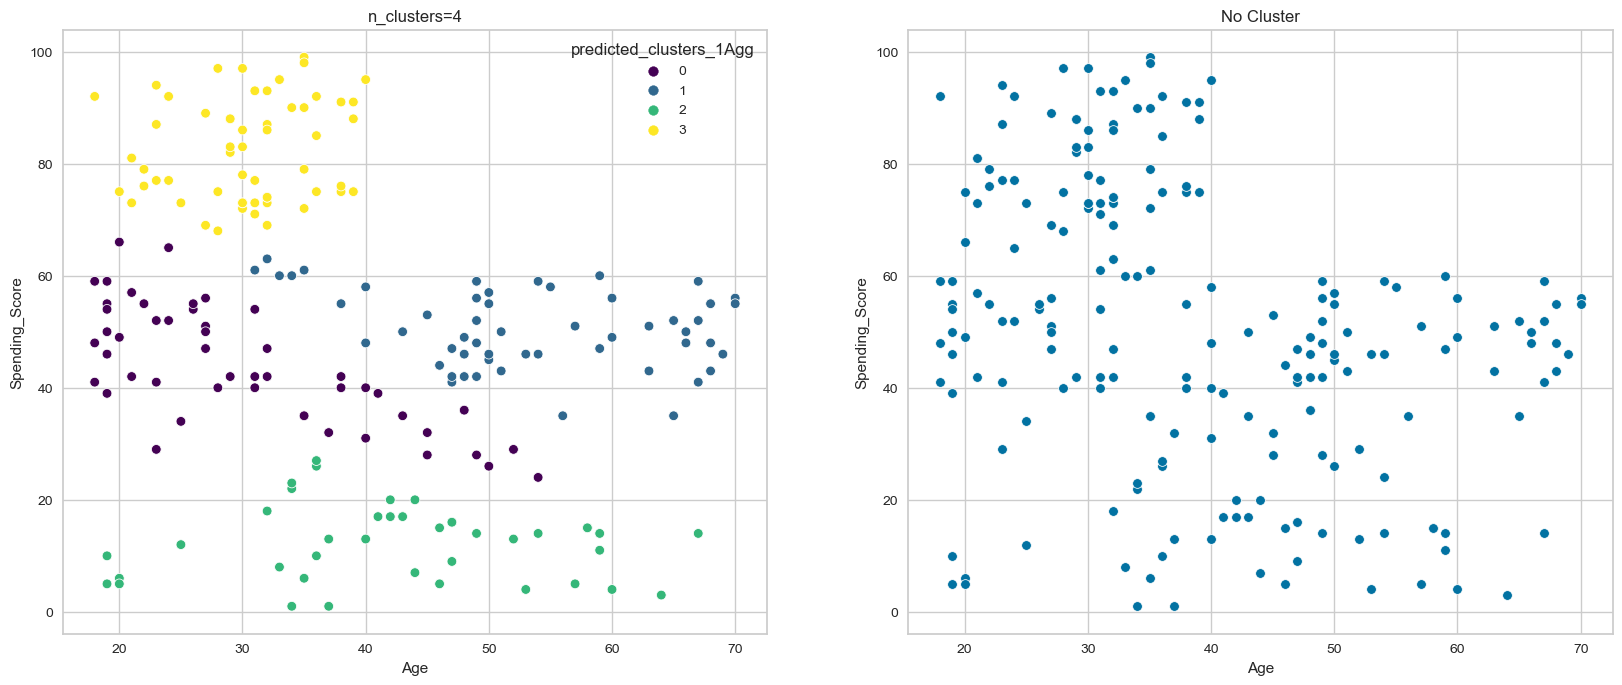

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df1, x = "Age",y = "Spending_Score", palette="viridis", hue = 'predicted_clusters_1Agg')
plt.title("n_clusters=4")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df1, x = "Age",y = "Spending_Score")
plt.title("No Cluster");

#### Annual Income and Spending Score- x2

In [ ]:
df2["predicted_clusters_2Agg"] = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward").fit_predict(df2)
df2.sample(10)

,Annual_Income,Spending_Score,predicted_clusters_2KMeans,predicted_clusters_2Agg
146,77,36,1,1
165,85,75,2,2
82,54,41,0,1
111,63,54,0,1
126,71,35,0,1
107,63,46,0,1
147,77,74,2,2
159,78,73,2,2
77,54,48,0,1
172,87,10,1,0


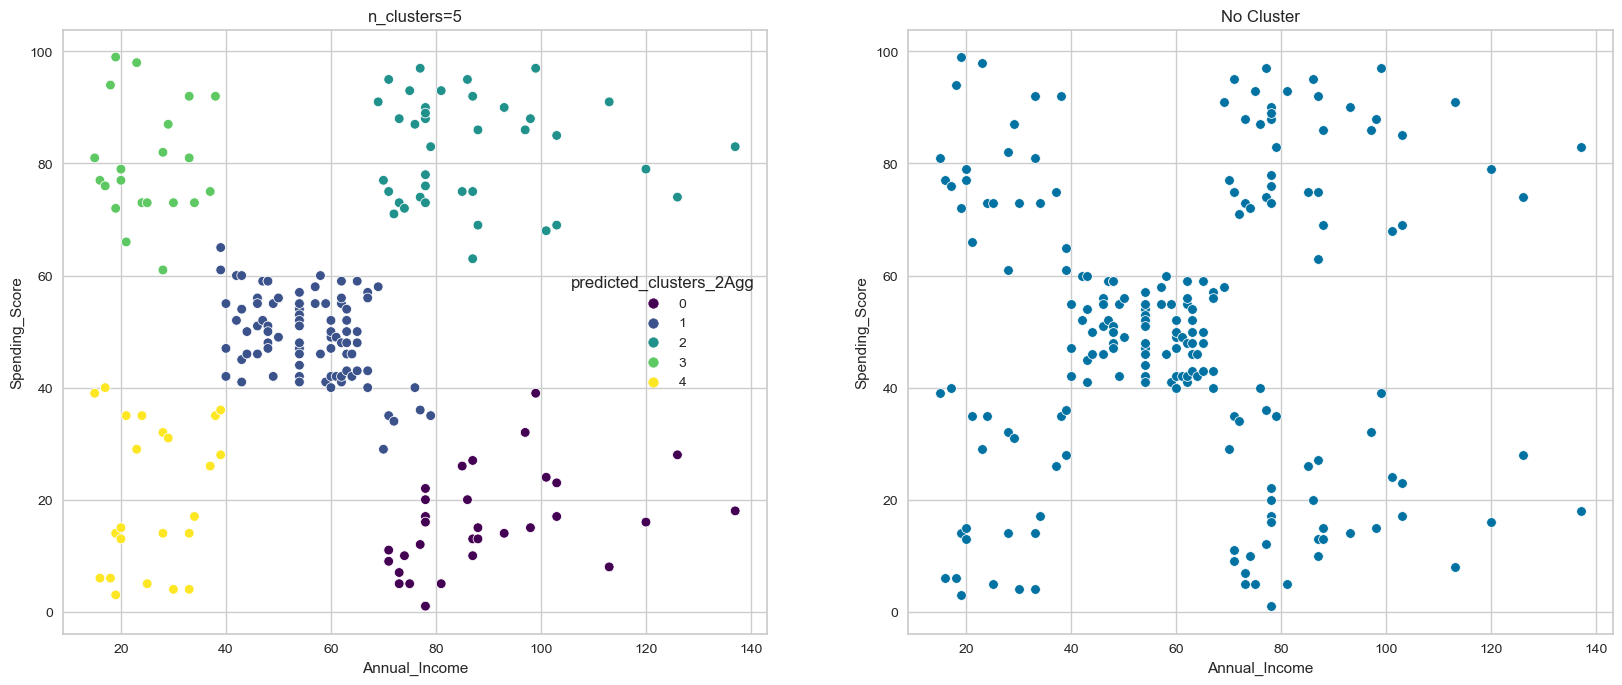

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.scatterplot(data =df2, x = "Annual_Income",y = "Spending_Score", palette="viridis", hue = 'predicted_clusters_2Agg')
plt.title("n_clusters=5")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df2, x = "Annual_Income",y = "Spending_Score")
plt.title("No Cluster");

## Conclusion

#### Interpretation based on Age and Spending Score- x1

In [ ]:
df1.head()

,Age,Spending_Score,predicted_clusters_1KMeans,predicted_clusters_1Agg
0,19,39,0,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,0,0


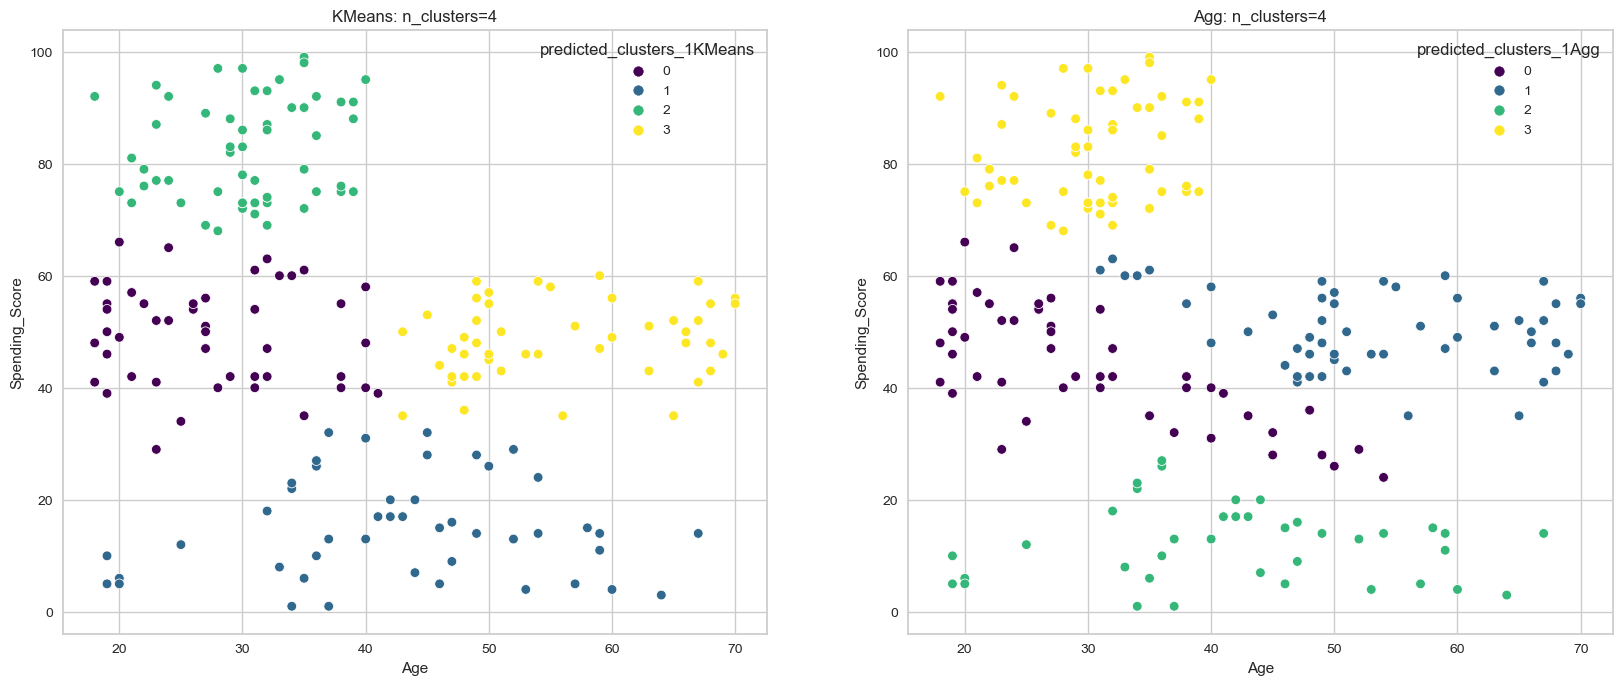

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
sns.scatterplot(data = df1, x = "Age",y = "Spending_Score", palette="viridis", hue = 'predicted_clusters_1KMeans')
plt.title("KMeans: n_clusters=4")

plt.subplot(1, 2, 2)
sns.scatterplot(data = df1, x = "Age",y = "Spending_Score", palette="viridis", hue = 'predicted_clusters_1Agg')
plt.title("Agg: n_clusters=4");

In [ ]:
df1["predicted_clusters_1KMeans"].value_counts(ascending=False)

2    57
1    48
3    48
0    47
Name: predicted_clusters_1KMeans, dtype: int64

In [ ]:
df1["predicted_clusters_1Agg"].value_counts(ascending=False)

3    57
1    53
0    50
2    40
Name: predicted_clusters_1Agg, dtype: int64

In [ ]:
# KMeans'de daha dengeli kümeleme gözüktüğünden KMeans ile devam edeceğiz
df3 = df.assign(predicted_clusters_1KMeans = df1["predicted_clusters_1KMeans"])
df3.head()

,Gender,Age,Annual_Income,Spending_Score,predicted_clusters_1KMeans
0,Male,19,15,39,0
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,0


In [ ]:
df3.groupby("predicted_clusters_1KMeans").mean()

,Age,Annual_Income,Spending_Score
predicted_clusters_1KMeans,,,
0,27.617,53.277,49.149
1,43.292,66.938,15.021
2,30.175,66.070,82.351
3,55.708,54.771,48.229


In [ ]:
df3.groupby(["Gender", "predicted_clusters_1KMeans"]).mean()

Age  Annual_Income  Spending_Score
Gender predicted_clusters_1KMeans                                      
Female 0                          28.621         55.517          46.793
       1                          43.583         63.083          18.500
       2                          29.788         63.697          81.727
       3                          54.154         54.231          48.962
Male   0                          26.000         49.667          52.944
       1                          43.000         70.792          11.542
       2                          30.708         69.333          83.208
       3                          57.545         55.409          47.364

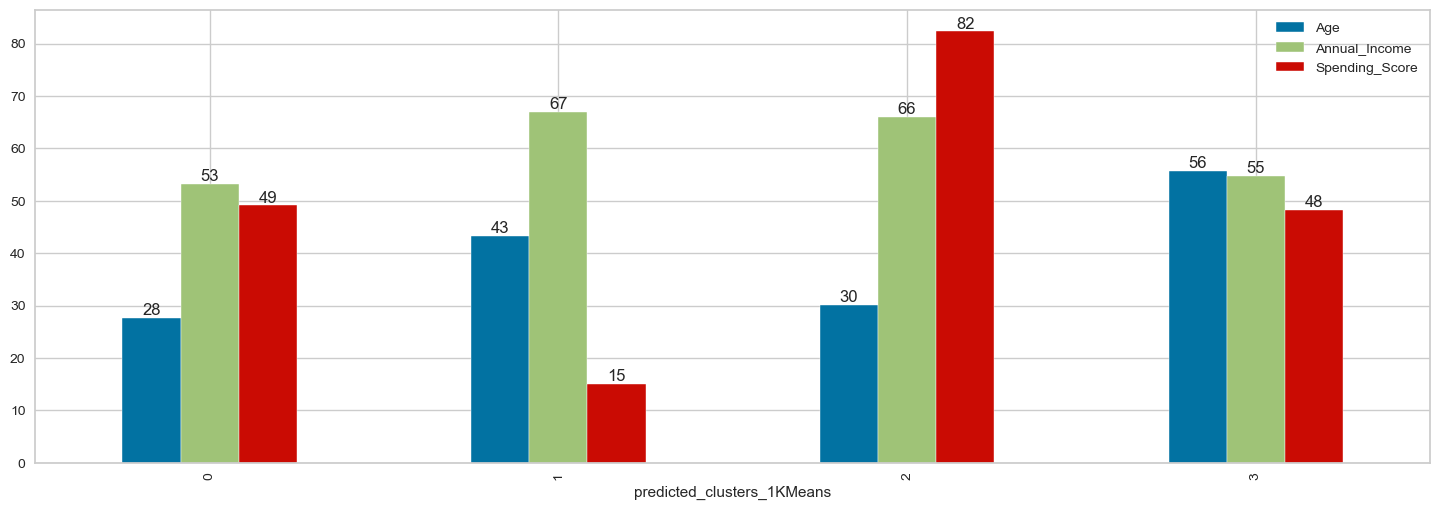

In [ ]:
ax = df3.groupby("predicted_clusters_1KMeans").mean().plot(kind='bar', figsize = (18,6))
for i in ax.containers:
    ax.bar_label(i, fmt="%.0f")

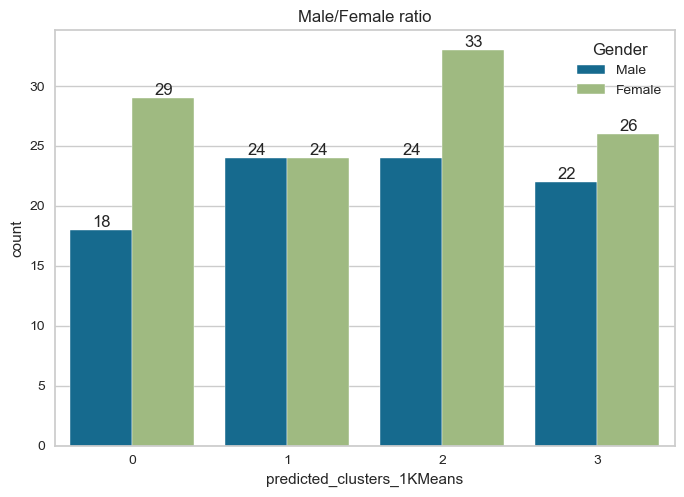

In [ ]:
plt.title("Male/Female ratio")
plt.ylabel("Count")
ax =sns.countplot(x=df3.predicted_clusters_1KMeans, hue=df3.Gender)
for i in ax.containers:
    ax.bar_label(i)

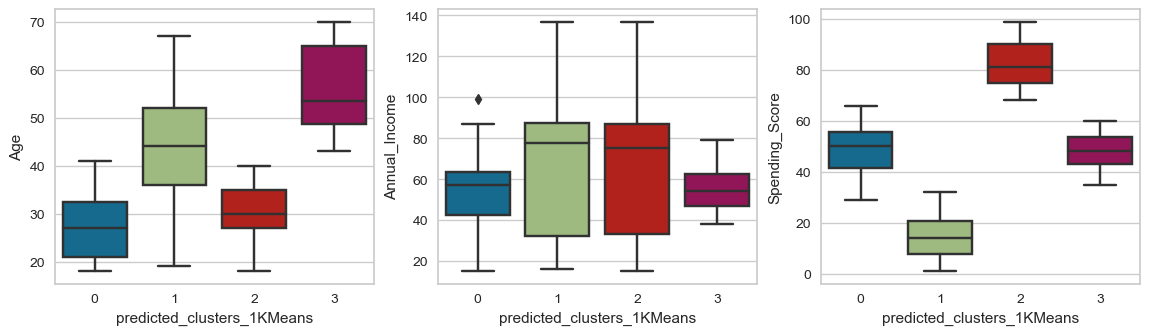

In [ ]:
plt.figure(figsize = (14,8))

plt.subplot(231)
sns.boxplot(x = "predicted_clusters_1KMeans", y = "Age", data = df3)

plt.subplot(232)
sns.boxplot(x = "predicted_clusters_1KMeans", y = "Annual_Income", data = df3)

plt.subplot(233)
sns.boxplot(x = "predicted_clusters_1KMeans", y = "Spending_Score", data = df3);

**cluster 0** : Ortalama yaş 28; annula_income ve spending_scores ise orta seviyede. Daha fazla harcamaya yönlendirmek için neler yapılabileceği araştırılmalıdır.

**cluster 1**: Ortalama yaş 43; annula_income çok yüksek olmasına karşın spending_scores çok düşük. Bu grup bizim hedef kitlemizdir ve bu grubu harcamaya yönlendirmek için özel stratejiler geliştirilmelidir.

**cluster 2** : Ortalama yaş 30; annula_income yüksek, harcama_skorları çok daha yüksek. Bu grup sadık müşterilerimizden oluşmaktadır. Şirketimiz ana kârını bu gruptan elde etmektedir. Kaçırmamak için çok özel promosyonlar yapılabilir.
    
**cluster 3**: Ortalama yaş 56; annula_income ve spending_scores ise orta seviyede. Cluster 0 ile yaş bakımından ayrışıyor. Bu grubu da daha fazla harcamaya yönlendirmek için neler yapılabileceği araştırılmalıdır.

#### Female/Male

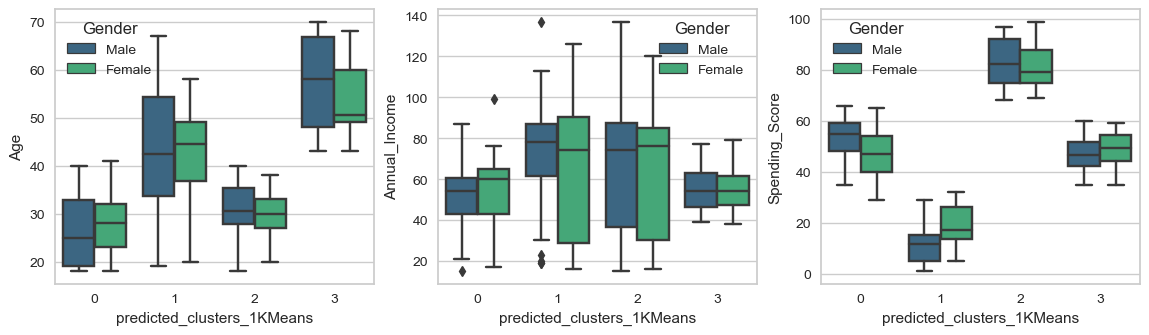

In [ ]:
plt.figure(figsize = (14,8))

plt.subplot(231)
sns.boxplot(x = "predicted_clusters_1KMeans", y = "Age", hue="Gender", palette="viridis", data = df3)

plt.subplot(232)
sns.boxplot(x = "predicted_clusters_1KMeans", y = "Annual_Income", hue="Gender", palette="viridis", data = df3)

plt.subplot(233)
sns.boxplot(x = "predicted_clusters_1KMeans", y = "Spending_Score", hue="Gender", palette="viridis", data = df3);

**cluster 0** : Ortalama yaş female:29, male:26. Erkeklerin kadınlara göre yıllık gelir ortalaması düşük olmakla birlikte harcama puanları daha yüksek. 

**cluster 1**: Ortalama yaş female:44, male:43. Kadınların erkeklere göre yıllık gelir ortalaması düşük olmakla birlikte harcama puanları daha yüksek.

**cluster 2** : Ortalama yaş female:30, male:31. Yıllık gelir ortalaması ve harcama puanları yaklaşık olarak aynı seviyede.
    
**cluster 3**: Ortalama yaş female:54, male:58. Yıllık gelir ortalaması ve harcama puanları yaklaşık olarak aynı seviyede.

#### Interpretation based on Annual Income and Spending Score- x2

In [ ]:
df2.head()

,Annual_Income,Spending_Score,predicted_clusters_2KMeans,predicted_clusters_2Agg
0,15,39,4,4
1,15,81,3,3
2,16,6,4,4
3,16,77,3,3
4,17,40,4,4


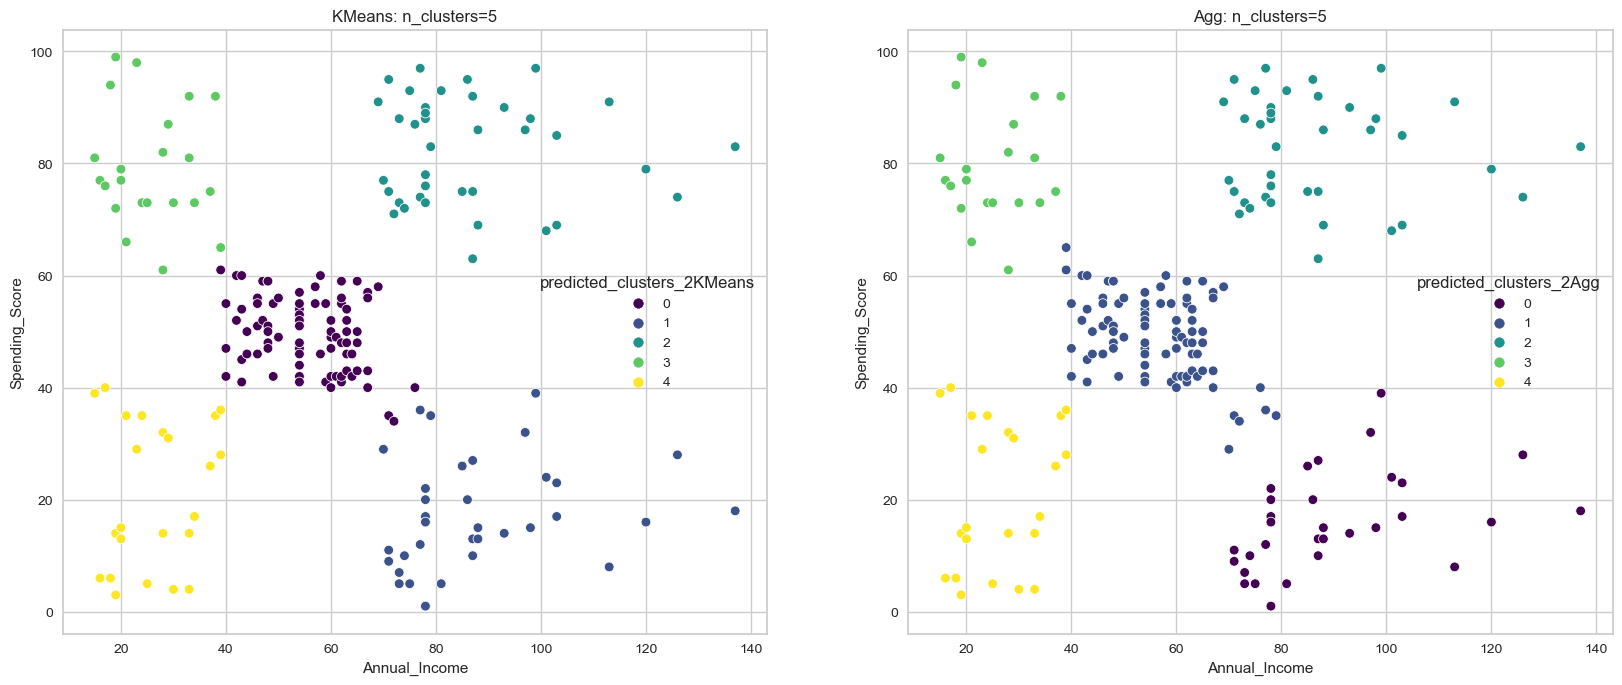

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
sns.scatterplot(data = df2, x = "Annual_Income", y = "Spending_Score", palette="viridis", hue = 'predicted_clusters_2KMeans')
plt.title("KMeans: n_clusters=5")

plt.subplot(1, 2, 2)
sns.scatterplot(data = df2, x = "Annual_Income", y = "Spending_Score", palette="viridis", hue = 'predicted_clusters_2Agg')
plt.title("Agg: n_clusters=5");

In [ ]:
df2["predicted_clusters_2KMeans"].value_counts(ascending=False)

0    81
2    39
1    35
4    23
3    22
Name: predicted_clusters_2KMeans, dtype: int64

In [ ]:
df2["predicted_clusters_2Agg"].value_counts(ascending=False)

1    85
2    39
0    32
4    23
3    21
Name: predicted_clusters_2Agg, dtype: int64

In [ ]:
# KMeans ve Agglomerative benzer kümeleme vermiş,birisini seçip (KMeans) onunla devam edeceğiz
df4 = df.assign(predicted_clusters_2KMeans = df2["predicted_clusters_2KMeans"])
df4.head()

,Gender,Age,Annual_Income,Spending_Score,predicted_clusters_2KMeans
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [ ]:
df4.groupby("predicted_clusters_2KMeans").mean()

,Age,Annual_Income,Spending_Score
predicted_clusters_2KMeans,,,
0,42.716,55.296,49.519
1,41.114,88.200,17.114
2,32.692,86.538,82.128
3,25.273,25.727,79.364
4,45.217,26.304,20.913


In [ ]:
df4.groupby(["Gender", "predicted_clusters_2KMeans"]).mean()

Age  Annual_Income  Spending_Score
Gender predicted_clusters_2KMeans                                      
Female 0                          40.896         55.354          49.000
       1                          43.250         90.938          22.062
       2                          32.190         86.048          81.667
       3                          25.462         25.692          80.538
       4                          43.214         27.357          21.714
Male   0                          45.364         55.212          50.273
       1                          39.316         85.895          12.947
       2                          33.278         87.111          82.667
       3                          25.000         25.778          77.667
       4                          48.333         24.667          19.667

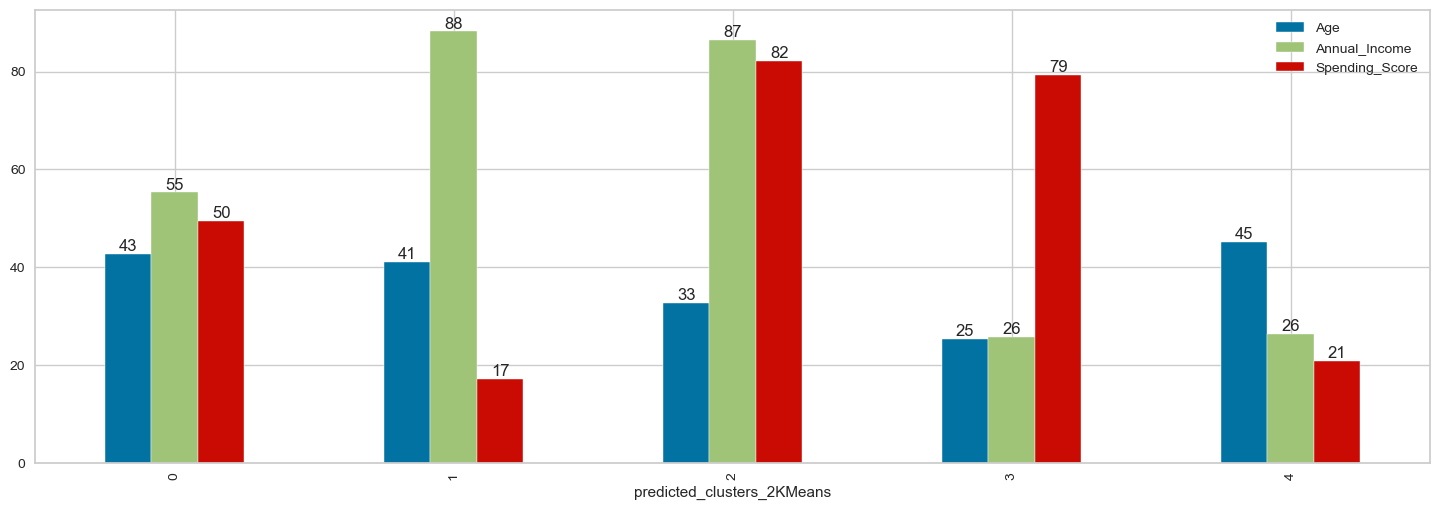

In [ ]:
ax = df4.groupby("predicted_clusters_2KMeans").mean().plot(kind='bar', figsize = (18,6))
for i in ax.containers:
    ax.bar_label(i, fmt="%.0f")

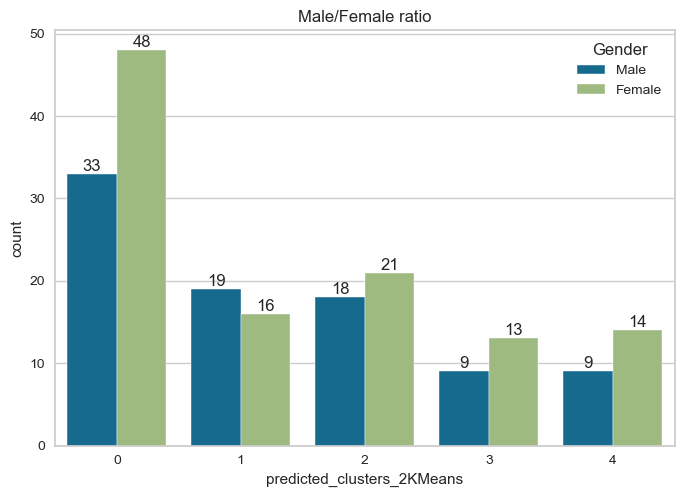

In [ ]:
plt.title("Male/Female ratio")
plt.ylabel("Count")
ax =sns.countplot(x=df4.predicted_clusters_2KMeans, hue=df4.Gender)
for i in ax.containers:
    ax.bar_label(i)

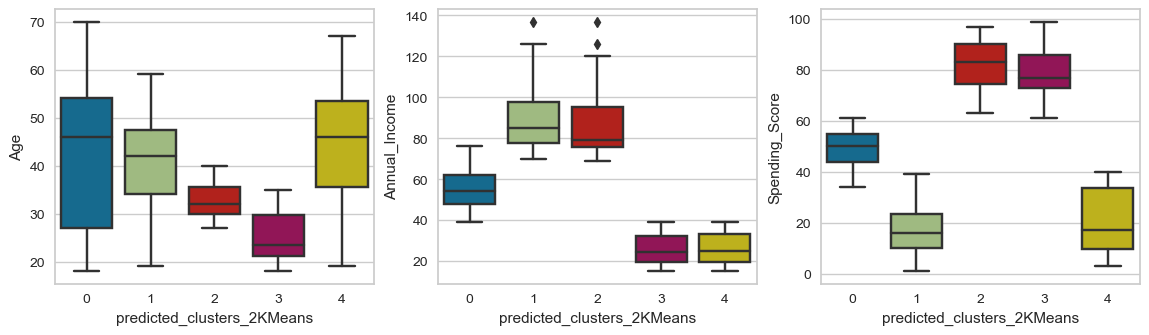

In [ ]:
plt.figure(figsize = (14,8))

plt.subplot(231)
sns.boxplot(x = "predicted_clusters_2KMeans", y = "Age", data = df4)

plt.subplot(232)
sns.boxplot(x = "predicted_clusters_2KMeans", y = "Annual_Income", data = df4)

plt.subplot(233)
sns.boxplot(x = "predicted_clusters_2KMeans", y = "Spending_Score", data = df4);

**cluster 0** : Ortalama yaş 43; hem annula_income hem de spending_scores ortalamadır. Daha fazla harcamaya yönlendirmek için neler yapılabileceği araştırılmalıdır.

**cluster 1**: Ortalama yaş 41; annula_income çok yüksek olmasına karşın spending_scores çok düşük. Bu grup bizim hedef kitlemizdir ve bu grubu harcamaya yönlendirmek için özel stratejiler geliştirilmelidir.

**cluster 2** : Ortalama yaş 33; annula_income ve spending_scores çok yüksek. Bu grup sadık müşterilerimizden oluşmaktadır. Şirketimiz ana kârını bu gruptan elde etmektedir. Kaçırmamak için çok özel promosyonlar yapılabilir.
    
**cluster 3**: Ortalama yaş 25; annula_income ve spending_scores ise orta seviyede. Yıllık gelirler düşük ama harcama puanları çok yüksek. Pahalı ürünler almaya yönlendirilebilir.
 
**cluster 4**: Ortalama yaş 45; Hem annula_income hem de spending_scores düşük. Hediye çeki ve benzeri promosyonlarla alışverişe yönlendirilebilir.

En düşük yaş ortalamasına sahip cluster 2 ve 3 en fazla harcama yapan gruplar.

#### Female/Male

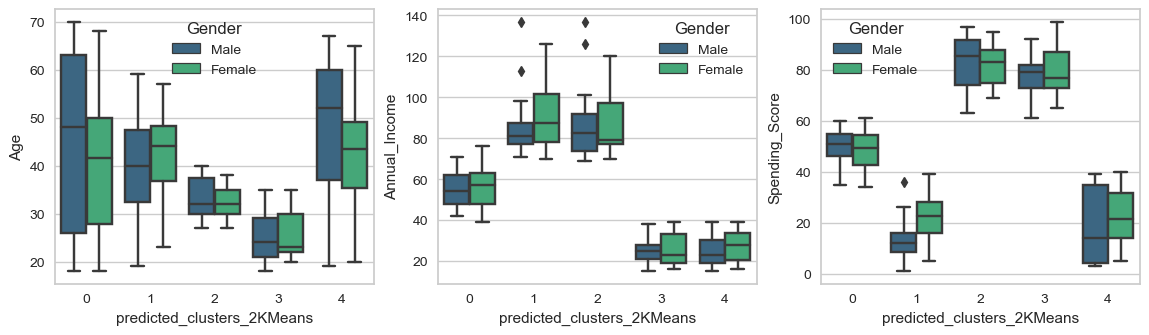

In [ ]:
plt.figure(figsize = (14,8))

plt.subplot(231)
sns.boxplot(x = "predicted_clusters_2KMeans", y = "Age", hue="Gender", palette="viridis", data = df4)

plt.subplot(232)
sns.boxplot(x = "predicted_clusters_2KMeans", y = "Annual_Income", hue="Gender", palette="viridis", data = df4)

plt.subplot(233)
sns.boxplot(x = "predicted_clusters_2KMeans", y = "Spending_Score", hue="Gender", palette="viridis", data = df4);

**cluster 0** : Ortalama yaş female:41, male:45. Yıllık gelir ortalaması ve harcama puanları yaklaşık olarak aynı seviyede. 

**cluster 1**: Ortalama yaş female:43, male:39. Kadınların erkeklere göre yıllık gelir ortalaması ve harcama puanları daha yüksek.

**cluster 2** : Ortalama yaş female:32, male:33. Yıllık gelir ortalaması ve harcama puanları yaklaşık olarak aynı seviyede.
    
**cluster 3**: Ortalama yaş female:25, male:25. Yıllık gelir ortalaması ve harcama puanları yaklaşık olarak aynı seviyede.

**cluster 4**: Ortalama yaş female:43, male:48. Yıllık gelir ortalaması ve harcama puanları yaklaşık olarak aynı seviyede.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___